**Contents**:
   - Read and display the image
   - Scale the image
   - Rotate the image
   - Translate the image (shift its position)
   - Apply Affine Transformation to the image

In [1]:
import pandas as pd
import numpy as np
import cv2 as cv
from cv2 import imwrite,imread
from matplotlib import pyplot as plt

In [ ]:
import os 

path = "path/to/your/folder"
os.chdir(path)
ListImg = os.listdir()
print(ListImg)

['cat.jpg', 'coffee.jpg', 'flower.jpg', 'motocycle.jpg']


##### Functions

In [3]:
def imshows(ImageData, LabelData, rows, cols, gridType = False):
  ImageArray = list(ImageData)
  LabelArray = list(LabelData)
  if(rows == 1 & cols == 1):
    fig = plt.figure(figsize=(20,20))
  else:
    fig = plt.figure(figsize=(cols*8,rows*5))

  for i in range(1, cols * rows + 1):
      fig.add_subplot(rows, cols, i)
      image = ImageArray[i - 1]
      if (len(image.shape) < 3):
          plt.imshow(image, plt.cm.gray)
          plt.grid(gridType)
      else:
          plt.imshow(image)
          plt.grid(gridType)
      plt.title(LabelArray[i - 1])
  plt.show()

In [4]:
def show2Img(img1, img2, title1 = "Image 1", title2 = "Image 2"):
  imshows([img1, img2], [title1, title2], 1, 2)

In [5]:
def resize_image(img, scale=None, new_size=None, interpolation=cv.INTER_CUBIC):
    height, width = img.shape[:2]

    if scale is not None:
        scale = tuple(scale)
        res = cv.resize(img, None, fx=scale[0], fy=scale[1], interpolation=interpolation)
    elif new_size is not None:
        res = cv.resize(img, new_size, interpolation=interpolation)
    else:
        raise ValueError("Either scale or new_size must be provided.")

    return res

In [6]:
def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    rotation_matrix = cv.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv.warpAffine(image, rotation_matrix, (w, h))
    return rotated_image

In [7]:
def translate_image(image, x_shift, y_shift):
    (h, w) = image.shape[:2]
    translation_matrix = np.float32([[1, 0, x_shift], [0, 1, y_shift]])
    translated_image = cv.warpAffine(image, translation_matrix, (w, h))
    return translated_image

In [ ]:
def affine_transform(image_path, pts1, pts2):
    img = cv.imread(image_path)
    assert img is not None, "File could not be read, check with os.path.exists()"
    rows, cols, ch = img.shape

    # Compute the affine transform matrix
    M = cv.getAffineTransform(np.float32(pts1), np.float32(pts2))

    # Apply the affine transformation
    dst = cv.warpAffine(img, M, (cols, rows))

    # Draw green points on the original image
    # for pt in pts1:
    #     cv.circle(img, tuple(pt), 5, (0, 255, 0), -1)  

    # Draw red points on the transformed image
    # for pt in pts2:
    #     cv.circle(dst, tuple(pt), 5, (0, 0, 255), -1)  

    # Display the input and output images
    plt.subplot(121), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), plt.title('Input')
    plt.subplot(122), plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB)), plt.title('Output')
    plt.show()

    return dst

##### Process Image

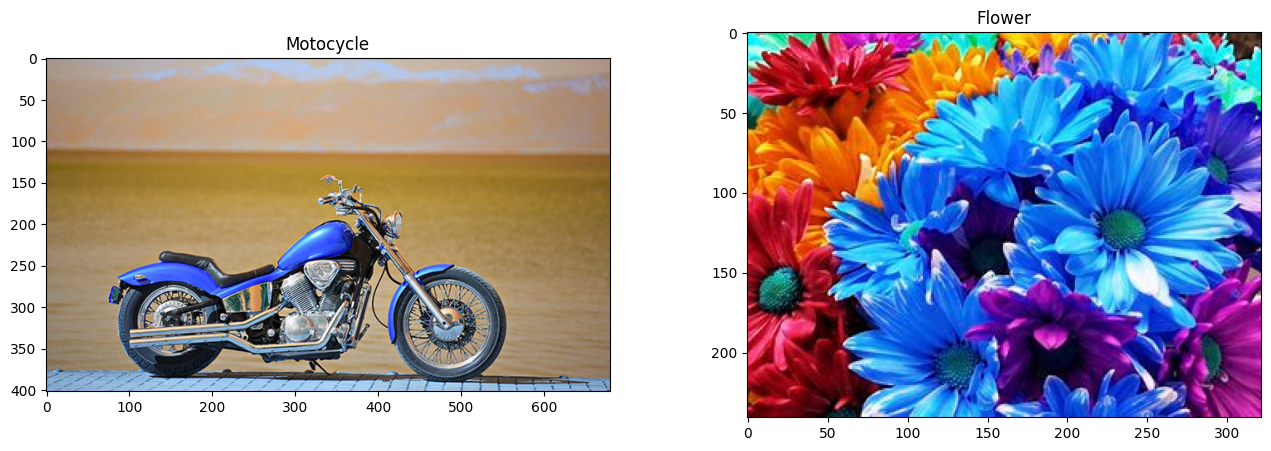

In [9]:
img = cv.imread("motocycle.jpg")
img_fl = cv.imread('flower.jpg')

show2Img(img, img_fl, "Motocycle", "Flower")

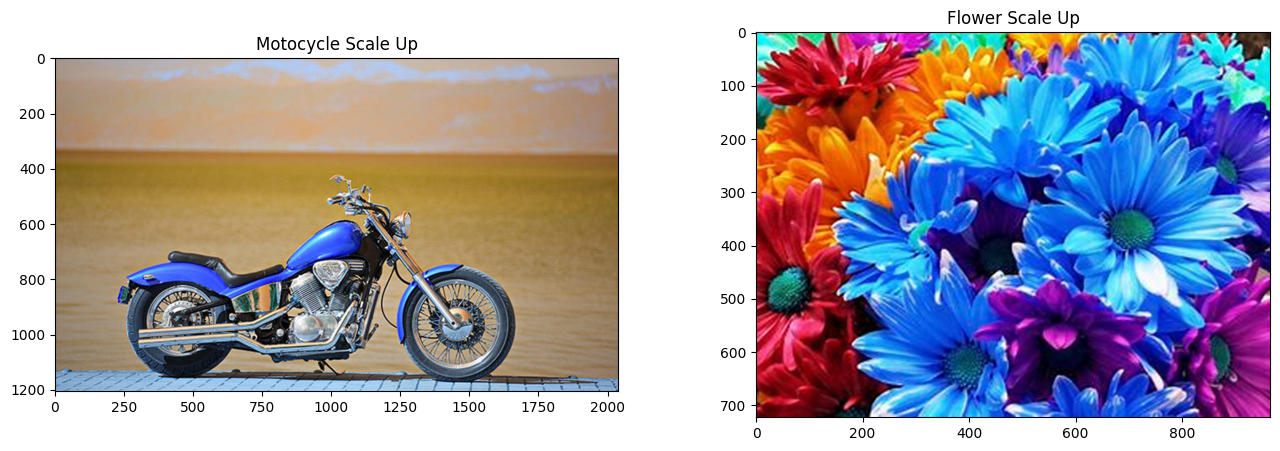

In [10]:
# apply scale up
img_scale_up = resize_image(img, scale=(3, 3))
imgFl_scale_up = resize_image(img_fl, scale=(3, 3))

show2Img(img_scale_up, imgFl_scale_up, "Motocycle Scale Up", "Flower Scale Up")

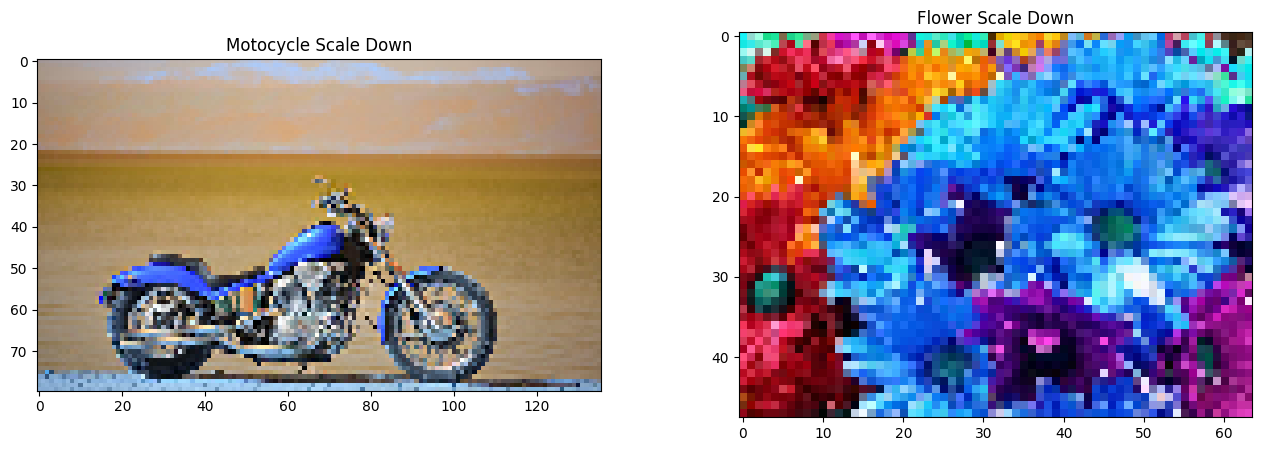

In [11]:
#apply scale down
img_scale_down = resize_image(img, scale=(0.2, 0.2))
imgFl_scale_down = resize_image(img_fl, scale=(0.2, 0.2))

show2Img(img_scale_down, imgFl_scale_down, "Motocycle Scale Down", "Flower Scale Down")

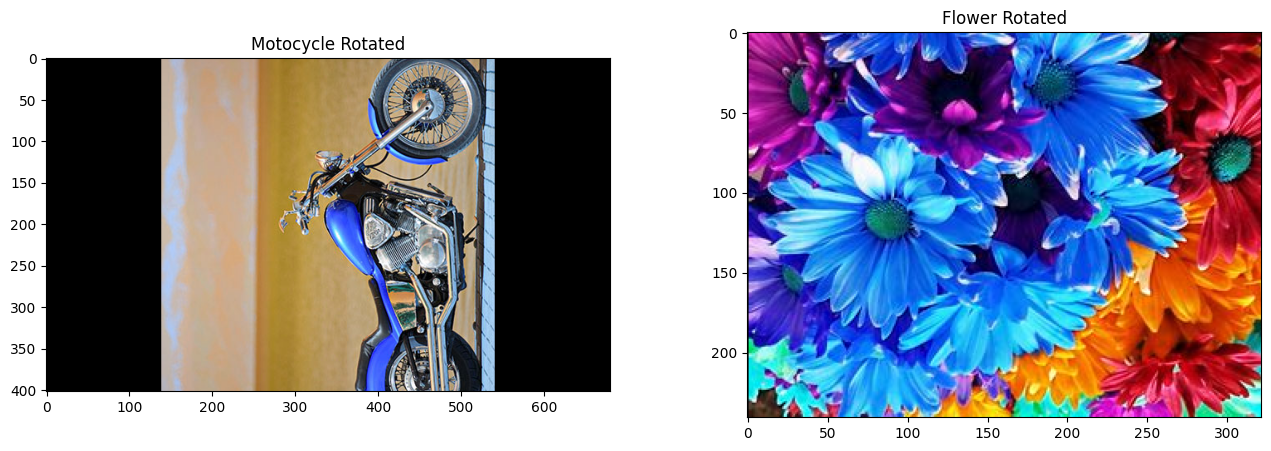

In [12]:
# rotate image
img_rotated = rotate_image(img, 90)
imgFl_rotated = rotate_image(img_fl, 180)

show2Img(img_rotated, imgFl_rotated, "Motocycle Rotated", "Flower Rotated")

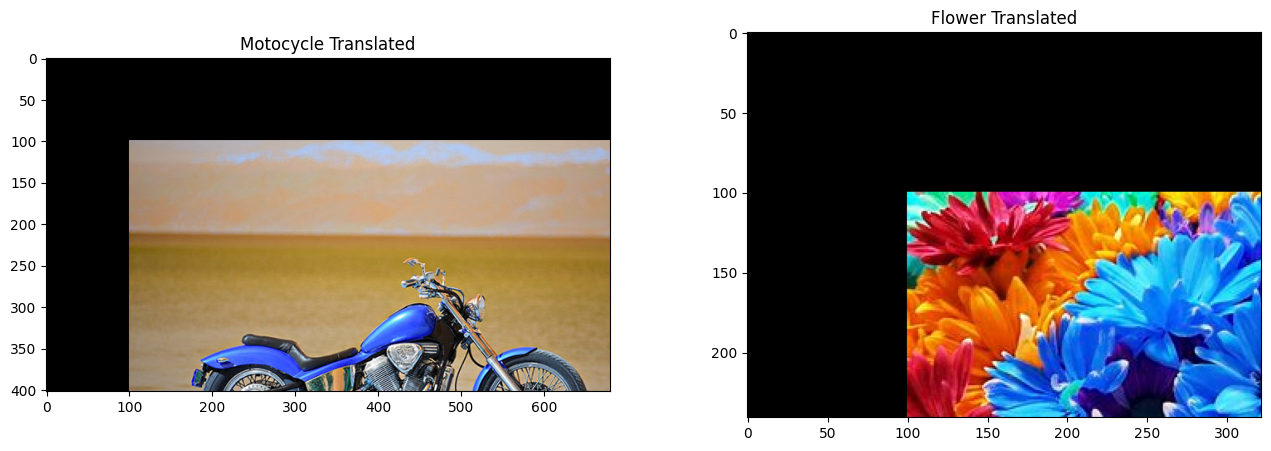

In [13]:
# shift image
img_translated = translate_image(img, 100, 100)
imgFl_translated = translate_image(img_fl, 100, 100)

show2Img(img_translated, imgFl_translated, "Motocycle Translated", "Flower Translated")

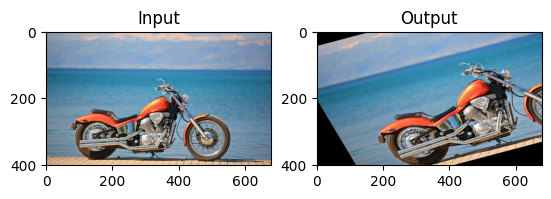

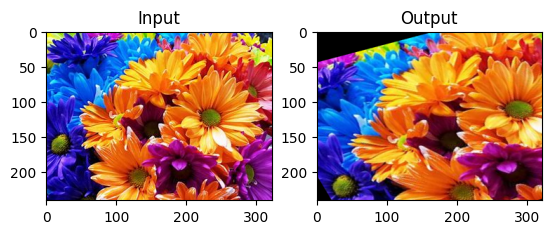

In [16]:
pts1 = [[50, 50], [200, 50], [50, 200]]
pts2 = [[10, 100], [200, 50], [100, 250]]

dst = affine_transform("motocycle.jpg", pts1, pts2)
dst_fl = affine_transform("flower.jpg", pts1, pts2)